In [40]:
import numpy as np
import pocomc as pc
import os
from getdist import plots, MCSamples
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#names = ["Bias parameter", "Growth rate"]
names = ["b", "f"]
labels = ["b", "f"]

ref_chain = np.load("../output/BOSS_DR12_NGC_z1/samples/n2048/cov_sample/cov_sample_2048_results_v1.npy", allow_pickle=True)
reference = MCSamples(samples=ref_chain[()]["samples"], labels=labels, names=names)

Removed no burn in


In [42]:
def plot_subresult(results):
    g = plots.getSubplotPlotter(subplot_size=3)
    g.settings.figure_legend_frame = False
    g.triangle_plot(
        [reference, MCSamples(samples=results["samples"], labels=labels, names=names)],
        filled=True,
        contour_args={'alpha':0.8}, title_limit=1,
        legend_labels=["Reference", "Subresult"]
    )
    plt.show()

In [134]:
estimates = [
    ['cov', 'sample', "Sample"],
    ['cov', 'shrinkage_emp', "Covariance shrinkage\ntarget $\mathbf{T}^{(1)}$ (empirical)"],
    ['cov', 'shrinkage_ana', "Covariance shrinkage\ntarget $\mathbf{T}^{(2)}$ (analytical)"],
    ['cov', 'NERCOME', "NERCOME"],
    ['pre', 'shrinkage_emp', "Precision shrinkage\ntarget $\mathbf{\Pi}_0^{(1)}$ (empirical)"],
    ['pre', 'shrinkage_ana', "Precision shrinkage\ntarget $\mathbf{\Pi}_0^{(2)}$ (analytical)"],
]

n = 30
iestimate = 5

mat_type = estimates[iestimate][0]
est_type = estimates[iestimate][1]
label = estimates[iestimate][2]

if n==24:
    param_limits = {"b": (1.83, 2.05), "f": (0.3, 0.9)}
elif n==30:
    param_limits = {"b": (1.85, 2.05), "f": (0.4, 0.85)}
elif n==2048:
    param_limits = {"b": (1.88, 2.02), "f": (0.45, 0.75)} # n=2048 tick limits

In [135]:
datapath = f"../output/BOSS_DR12_NGC_z1/samples/n{n}/{mat_type}_{est_type}/"
filenames = [f for f in os.listdir(datapath) if not f.startswith('.')]

nresults = len(filenames) # Number of subsamples
ndim = len(names) # Number of parameters sampled
nparticles = 2000 # Number of particles from pocoMC
nsamples = nresults * nparticles

remove = []
nremove = len(remove) * nparticles

f_avg = []
b_avg = []

chain = np.empty((nsamples-nremove, ndim))
j = 0
for k, filename in enumerate(filenames):
    
    if k in remove:
        continue
    
    results = np.load(os.path.join(datapath, filename), allow_pickle=True)[()]
    b_avg.append(np.mean(results["samples"][:,0]))
    f_avg.append(np.mean(results["samples"][:,1]))
    #print(f"Result #{k}")
    #plot_subresult(results)
    chain[j*nparticles:(j+1)*nparticles,:] = results["samples"]
    j += 1

f_avg = np.array(f_avg)
b_avg = np.array(b_avg)

samples = MCSamples(samples=chain, labels=labels, names=names)
#np.save(f"../output/BOSS_DR12_NGC_z1/samples/n{n}/{mat_type}_{est_type}_{n}", samples)

Removed no burn in


In [136]:
print(b_avg)
print(f_avg)

[1.9664437 1.9570266 1.9420065 1.9599409 1.940446  1.9338943 1.9587151
 1.9322709 1.9389932 1.9333757 1.9695549 1.9798567 1.914049  1.9525578
 1.9704988 1.9371873 1.9480317 1.942381  1.9429936 1.954609  1.9427006
 1.9425142 1.9202971 1.9502465 1.9556253 1.9416293 1.9245496 1.9167371
 1.9487351 1.9238468 1.9412595 1.9336762 1.9188349 1.9725083 1.9375832
 1.9616611 1.9464656 1.9485248 1.9348485 1.9322276 1.9539902 1.9377754
 1.9361471 1.9583696 1.9204603 1.9358646 1.9354239 1.9532931 1.9592509
 1.9566591 1.9481297 1.9216088 1.9519202 1.9530572 1.9116638 1.92524
 1.9757801 1.9631162 1.9162292 1.9606491 1.9648508 1.9612279 1.9520166
 1.9458017 1.9304966 1.9446628 1.9523027 1.9054797]
[0.61248255 0.60291916 0.60852623 0.58379775 0.59866583 0.6319563
 0.60477495 0.62585354 0.62401915 0.6127891  0.61458415 0.59559524
 0.6528468  0.6125084  0.61618996 0.62618613 0.6216611  0.6130411
 0.6334318  0.61530495 0.641269   0.606057   0.6263024  0.6063922
 0.6382295  0.6201776  0.6209209  0.612005   0

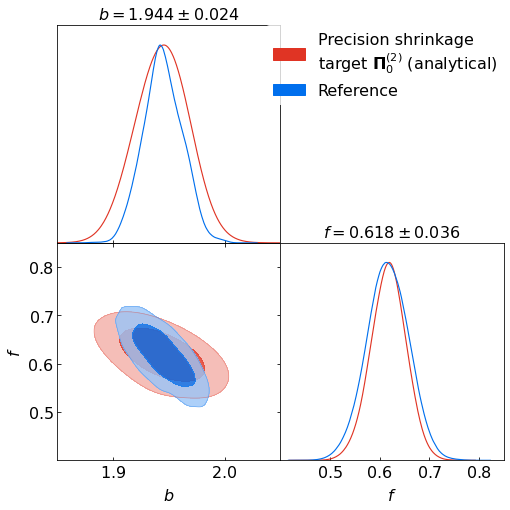

In [137]:
g = plots.getSubplotPlotter(subplot_size=4)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize=16
g.settings.axes_fontsize=16
g.settings.axes_labelsize=16
g.triangle_plot(
    [samples, reference],
    filled=True,
    contour_args={'alpha':0.8}, title_limit=1,
    legend_labels=[label, "Reference"],
    param_limits = param_limits,
)

#cont_plot = g.get_axes(ax=(1,0))
#cont_plot.scatter(b_avg, f_avg, c="green", marker="+")

#plt.savefig(f"../output/{mat_type}_{est_type}_n{n}.pdf", format="pdf", bbox_inches='tight', pad_inches = 0.1)
#plt.savefig(f"../output/BOSS_DR12_NGC_z1/plots/samples/{mat_type}_{est_type}_n{n}.pdf", format="pdf", bbox_inches='tight', pad_inches = 0.1)